# Esercitazione 4 - Lasso e Perceptrone

Vi rircordate che Ridge regression penalizzava la soluzione con un termine modificato da un parametro?
Oggi vediamo come cambia l'allenamento di un algoritmo predittivo in base a questo termine.
Per farlo, ci serviamo di Lasso.

<a target="_blank" href="https://colab.research.google.com/github/zangobot/BusinessAnalytics_TeachingMaterial/blob/main/Esercitazione%204%20-%20Lasso%20e%20Perceptrone.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Lasso risolve il seguente problema:

$min_w ||y - Xw||^2_2 + alpha * ||w||_1$

dove $\alpha$ controlla la norma 1 della retta che stiamo calcolando.
Che cosa significa?
Che altro algoritmo vi ricorda?



In [183]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

data = pd.read_csv('dati/penguins_size.csv').dropna()
X, Y = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], data['sex'] # ATTENZIONE: ci sono dei dati con il valore '.' all'interno del dataset
X, Y = X[Y!='.'], Y[Y!='.']

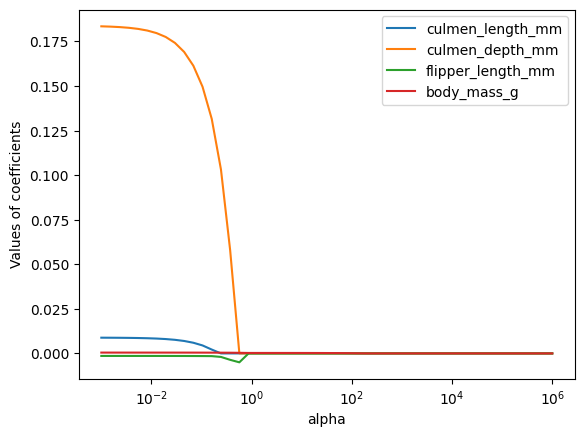

In [184]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

encoder = LabelEncoder()  # ATTENZIONE: Lasso non accetta valori stringa come classi (a differenza di KNN), bisogna quindi codificarle come numeri
alphas = np.logspace(-3, 6, 50)
lasso_clfs = []
lasso_coefs = np.zeros((len(alphas), X.shape[1]))
for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    labels = encoder.fit_transform(Y)
    lasso.fit(X, labels)
    lasso_coefs[i] = lasso.coef_
    lasso_clfs.append(lasso)

for n, c in zip(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], lasso_coefs.T):
    plt.semilogx(alphas, c, label=n)
plt.xlabel('alpha')
plt.ylabel('Values of coefficients')
plt.legend()

I dati vengono pesati in modo diverso dal modello al variare del parametro di regolarizzazione $\alpha$.
Che cosa sta succedendo in particolare?

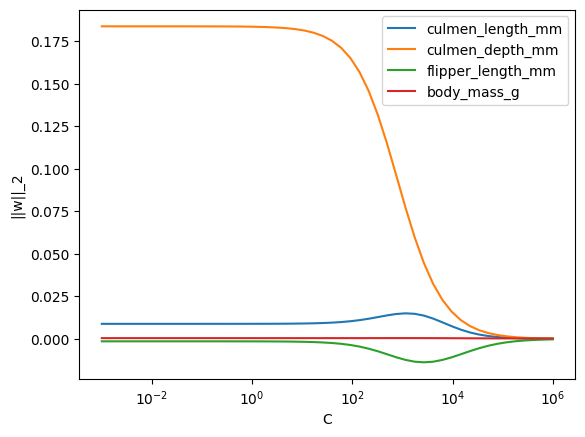

In [182]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 6, 50)

ridge_coefs = np.zeros((len(alphas), X.shape[1]))
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha)
    labels = encoder.fit_transform(Y)
    ridge.fit(X, labels)
    ridge_coefs[i] = ridge.coef_

for n, c in zip(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], ridge_coefs.T):
    plt.semilogx(alphas, c, label=n)
plt.xlabel('alpha')
plt.ylabel('Values of coefficients')
plt.legend()